# Heavy Traffic Indicators on I-94

<img src="I-94.png" width = "75" height = "75" align = "center"/>

<img src = "I-94_map.png" width = "300" height = "150" align = "center"/>

In this project we will analyze the **westbound traffic** on the I-94 Interstate highway. We aim to determine a few indicators of heavy traffic on I-94; which can be weather type, time of the day, time of the week, etc.

The dataset was made available by John Hogue and can be accessed from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

## Summary of Results

After analyzing the data, our conclusion is there are two types of indicators:
- Time Indicators
   - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
   - The traffic is usually heavier on weekdays compared to weekends.
   - On weekdays, the rush hours are around 7 and 16.
   
   
- Weather Indicators
    - Shower snow
    - Proximity thunderstorm with rain
    - Light rain and snow
    
For more details, please refer to the the full analysis below.

## Data Exploration

In [1]:
#Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Read in the data
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

#Quick exploration of data
print(df.shape)
df.head()

(48204, 9)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48204 rows and 9 columns, with no null-values. Each row describes traffic and weather condition for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00. Most of the columns have the correct data type, except for ``date_time`` where it is an object. We will convert it into `datetime`.

In [5]:
#converting date_time column
df["date_time"] = pd.to_datetime(df['date_time'])

The traffic data was recorded a station located between Minneapolis and Saint Paul (see the dataset documentation). For this station, the direction of the route is westbound. This means that the results of our analysis will be about the westbound route, signifying that we should avoid making a generalization for the entire I-94 highway based on our results.

## Analyzing Traffic Volume

Our first step will be analyzing the `traffic_volume` column by examining its distribution

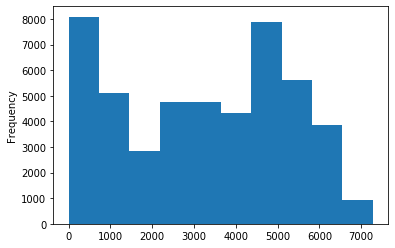

In [6]:
df['traffic_volume'].plot.hist()
plt.show()

In [7]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the statistics above, we can see that the traffic volume varied from 0 to 7280, with an average of 3380. About 25% of the time, there were only 1193 cars passing through; while another 25% of the time there were 4933 cars (about 4 times as much traffic). 

One assumption that can be made from our findings is that the high number of traffic probably occurs during daytime, specifically during rush hour. When traffic is slow, it may happen during night time or when there is a construction on the road.

### Daytime vs. Nighttime Traffic

From our previous finding, there is a possibility that nighttime and daytime might influence traffic volume. This gives us an interesting direction for our analysis: comparing nighttime and daytime data.

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [8]:
#Isolating daytime
daytime = df.copy()[(df["date_time"].dt.hour >= 7) & (df["date_time"].dt.hour < 19)]
print(daytime.shape)

#Isolating nighttime
nighttime = df.copy()[(df["date_time"].dt.hour >= 19) | (df["date_time"].dt.hour < 7)]
print(nighttime.shape)                    

(23877, 9)
(24327, 9)


There is a significant difference between the daytime and nighttime data due to a few hours of missing data. Below we can see an example of the missing data — there is missing data for hours 4 and 5.



In [9]:
#Example of missing data
df.iloc[176:178]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
176,None,281.17,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 03:00:00,361
177,None,281.25,0.0,0.0,92,Clear,sky is clear,2012-10-10 06:00:00,5875


### Daytime vs. Nighttime Traffic - Histogram

We will continue our analysis by comparing daytime and nighttime data side-by-side using a histogram on a grid chart.

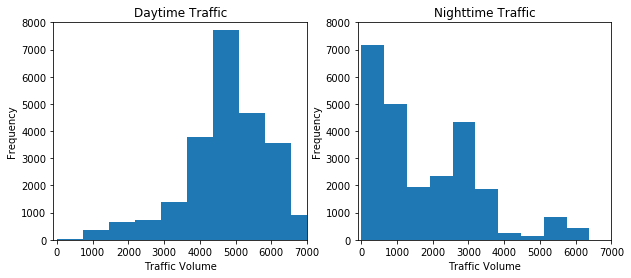

In [25]:
plt.figure(figsize=(10, 4))

#Plot daytime traffic
plt.subplot(1, 2, 1)
daytime['traffic_volume'].plot.hist()
plt.title('Daytime Traffic')
plt.xlabel('Traffic Volume')
plt.ylim(0, 8000)
plt.xlim(-100, 7000)

#Plot nighttime traffic
plt.subplot(1, 2, 2)
nighttime['traffic_volume'].plot.hist()
plt.title('Nighttime Traffic')
plt.xlabel('Traffic Volume')
plt.ylim(0, 8000)
plt.xlim(-100, 7000)
plt.show()

In [34]:
#Print statistics for daytime and nighttime traffic
print(f"--Daytime Traffic-- \n{daytime['traffic_volume'].describe()}")
print(f"\n--Nighttime Traffic-- \n{nighttime['traffic_volume'].describe()}")


--Daytime Traffic-- 
count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

--Nighttime Traffic-- 
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


We can observe from the histogram that traffic volume is mostly high during the day, emphasized by the histogram being right-skewed. Daytime traffic has an average of 4762 cars, with more than 4252 cars passing through the station at 75% of the time.

The histogram for the nighttime traffic shows lower traffic volume as the histogram is left-skewed. The average of cars passing through during the night is only 1785, and 75% of the time, less than 2819 cars passed the station.

As our goal is to find the indicators of heavy traffic, we will not use the nighttime data and focus on the daytime data moving forward. 

### Time Indicators - Month

(4300, 5000)

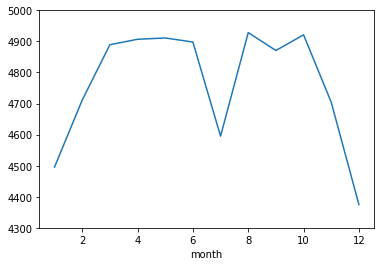

In [45]:
#creating month column
daytime['month'] = daytime['date_time'].dt.month

#average traffic volume by month
by_month = daytime.groupby('month').mean()

#Line plot for traffic volume grouped by month
by_month['traffic_volume'].plot.line()
plt.ylim(4300, 5000)

The line plot shows there is a variation of traffic volume during the year, but generally traffic is slow during the cold months (November - February) and heavy during the warm months (March - October).\
While the average traffic volume during the warm months are similar, there is an interesting exception on July. This brings the question — what happened on July? Is traffic significantly slower during July each year, or is there a specific situation that causes this drop? 

To answer our question, let's see how traffic volume changed during July each year.

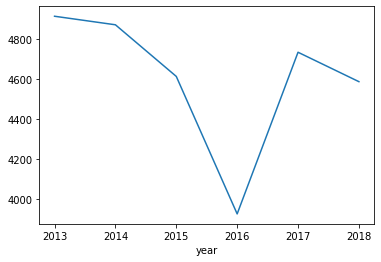

In [48]:
#creating year column
daytime['year'] = daytime['date_time'].dt.year

#traffic for July each year
only_july = daytime[daytime['month'] == 7].groupby('year').mean()

#line plot for traffic volume on July each year
only_july['traffic_volume'].plot.line()

The line plot shows while traffic volume on July is usually heavy, there is a significant decrease on July 2016. Further research produces several reasons for this; one is road construction as supported by [this article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696). Another possible reason is the freeway being closed because of [protests](https://www.startribune.com/marchers-block-i-94-to-westbound-traffic/386158771/)

Our preliminary conclusion is heavy traffic happens during warm months, while during cold months it is generally slower. We can expect up almost 5000 cars in traffic volume during each hour of daytime during warm months.

### Time Indicators - Day of the Week

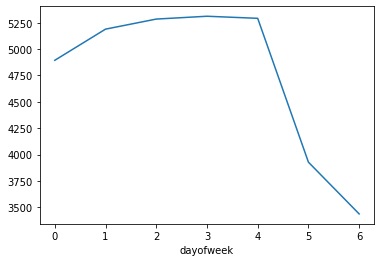

In [51]:
#creating dayofweek column
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
#0 is Monday and 6 is Sunday

by_dayofweek = daytime.groupby('dayofweek').mean()

by_dayofweek['traffic_volume'].plot.line()

The line graph shows that traffic is heavy during weekdays, with an average above 5000 cars, except for Monday.
Traffic volume is lighter during weekends, averaging belom 4000 cars for both Saturday and Sunday.

### Time Indicators - Time of the Day

We will continue our analysis by generating a line plot for the time of the day. As there is a big difference between the weekdays and weekends data, we will split the dataset to look at the averages separately.

(1500, 6500)

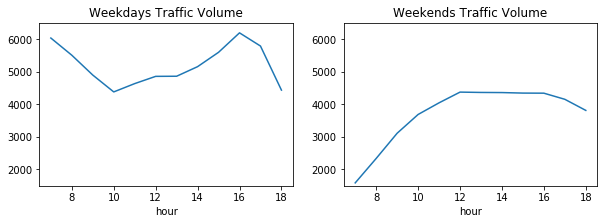

In [63]:
daytime['hour'] = daytime['date_time'].dt.hour

#separating weekdays and weekends data
weekdays = daytime[daytime['dayofweek'] < 5]
weekend = daytime[daytime['dayofweek'] >= 5]

#grouping data by hour
by_weekdays = weekdays.groupby('hour').mean()
by_weekend = weekend.groupby('hour').mean()

plt.figure(figsize = (10, 3))

#line plot for weekdays
plt.subplot(1, 2, 1)
by_weekdays['traffic_volume'].plot.line()
plt.title('Weekdays Traffic Volume')
plt.ylim(1500, 6500)

#line plot for weekends
plt.subplot(1, 2, 2)
by_weekend['traffic_volume'].plot.line()
plt.title('Weekends Traffic Volume')
plt.ylim(1500, 6500)

From the line graph, we can see that traffic is heavier during the weekdays compared to the weekends. As expected, weekdays traffic is the highest during rush hours at 7 and 16, reaching over 6000 cars during those hours. This is the time when most people travel to work and back home. 

To summarize, we found a few time-related indicators of heavy traffic:
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on weekdays compared to weekends.
- On weekdays, the rush hours are around 7 and 16.

### Weather Indicators 

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

As some of these columns are numerical, we will look up their correlation values with `traffic_volume`. We will use a heatmap as a tool to visualize and give a better idea of the correlation between the columns.

In [76]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

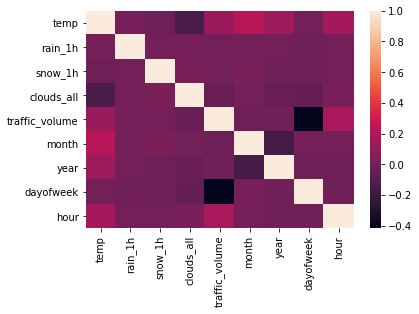

In [77]:
sns.heatmap(daytime.corr())

Temperature gives the strongest correlation, with a value of only +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) shows weak correlation with traffic_volume.

We will continue our analysis by plotting a scatter plot to further show the relationship between temperature and traffic volume.

(230, 320)

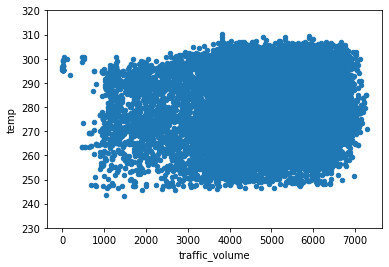

In [84]:
#Plotting scatter plot
daytime.plot.scatter('traffic_volume', 'temp')

plt.ylim(230, 320) #two temperatures at 0 messed up y-axis

The scatter plot shows the relationship is very weak for temperature to be considered as an indicator for heavy traffic.

We will proceed to examine the remaining columns, `weather_main` and `weather_description`.

### Weather Types

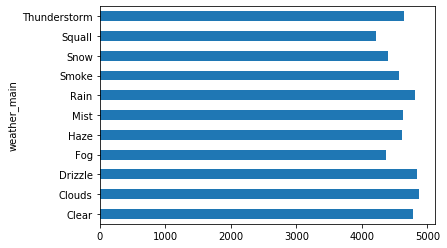

In [89]:
#grouping by weather_main
by_weather_main = daytime.groupby('weather_main').mean()

#creating horizontal bar plot
by_weather_main['traffic_volume'].plot.barh()

It looks like there is no traffic with a value over 5000, which makes it too difficult to determine the heavy traffic indicator. We will continue grouping by `weather_description` as it has a more detailed classification

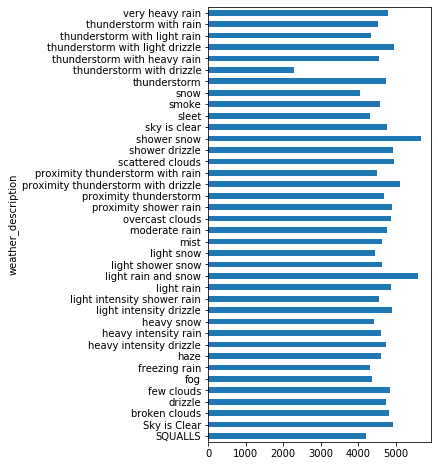

In [94]:
#grouping by weather_description
by_weather_description = daytime.groupby('weather_description').mean()

#creating horizontal bar plot
plt.figure(figsize = (4, 8))
by_weather_description['traffic_volume'].plot.barh()

There are three weather types with traffic volume higher than 5000:
- Shower snow
- Proximity thunderstorm with rain
- Light rain and snow

## Conclusion

Our goal for this project is to find indicators for heavy traffic on the I-94 Interstate highway, specifically the westbound traffic. Through our analysis, we found two types of indicators:

- Time Indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on weekdays compared to weekends.
    - On weekdays, the rush hours are around 7 and 16.


- Weather Indicators
    - Shower snow
    - Proximity thunderstorm with rain
    - Light rain and snow